In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from tqdm import tnrange


In [2]:
length = 50000
ap_true_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/ap_true/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/gru_l20_h40_0.2ms_test.npy").flatten()
nona_true_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona_true/gru_l20_h40_0.2ms_test.npy").flatten()
spk_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].flatten()

prec_ap_true_active, rec_ap_true_active, _ = precision_recall_curve(spk_active, ap_true_active)
prec_na_true_active, rec_na_true_active, _ = precision_recall_curve(spk_active, na_true_active)
prec_nona_true_active, rec_nona_true_active, _ = precision_recall_curve(spk_active, nona_true_active)

fpr_ap_true_active, tpr_ap_true_active, thresholds_ap_true_active = metrics.roc_curve(spk_active, ap_true_active)
fpr_na_true_active, tpr_na_true_active, thresholds_na_true_active = metrics.roc_curve(spk_active, na_true_active)
fpr_nona_true_active, tpr_nona_true_active, thresholds_nona_true_active = metrics.roc_curve(spk_active, nona_true_active)

prarea_ap_true_active_array = np.zeros((20))
prarea_na_true_active_array = np.zeros((20))
prarea_nona_true_active_array = np.zeros((20))

rocarea_ap_true_active_array = np.zeros((20))
rocarea_na_true_active_array = np.zeros((20))
rocarea_nona_true_active_array = np.zeros((20))

for i in tnrange(20):
    part_prec_ap_true_active, part_rec_ap_true_active, _ = precision_recall_curve(spk_active[i*length:(i+1)*length], ap_true_active[i*length:(i+1)*length])
    part_prec_na_true_active, part_rec_na_true_active, _ = precision_recall_curve(spk_active[i*length:(i+1)*length], na_true_active[i*length:(i+1)*length])
    part_prec_nona_true_active, part_rec_nona_true_active, _ = precision_recall_curve(spk_active[i*length:(i+1)*length], nona_true_active[i*length:(i+1)*length])
    
    prarea_ap_true_active_array[i] = metrics.auc(part_rec_ap_true_active, part_prec_ap_true_active)
    prarea_na_true_active_array[i] = metrics.auc(part_rec_na_true_active, part_prec_na_true_active)
    prarea_nona_true_active_array[i] = metrics.auc(part_rec_nona_true_active, part_prec_nona_true_active)
    
    rocarea_ap_true_active_array[i] = metrics.roc_auc_score(spk_active[i*length:(i+1)*length], ap_true_active[i*length:(i+1)*length])
    rocarea_na_true_active_array[i] = metrics.roc_auc_score(spk_active[i*length:(i+1)*length], na_true_active[i*length:(i+1)*length])
    rocarea_nona_true_active_array[i] = metrics.roc_auc_score(spk_active[i*length:(i+1)*length], nona_true_active[i*length:(i+1)*length])

/tmp/ipykernel_25035/105049692.py:23: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

/tmp/ipykernel_25035/2439269475.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


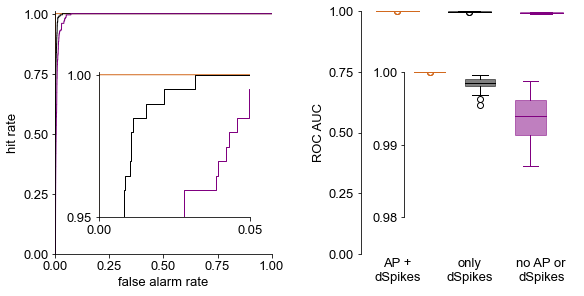

In [5]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig.add_gridspec(1,2, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[0])

color1 = "chocolate"
color2 = "black"
color3 = "purple"

colors = [color1, color2, color3]

bp1 = ax1.boxplot(rocarea_ap_true_active_array, positions=[1], widths = 0.6, patch_artist=True)
bp2 = ax1.boxplot(rocarea_na_true_active_array, positions=[2], widths = 0.6, patch_artist=True)
bp3 = ax1.boxplot(rocarea_nona_true_active_array, positions=[3], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3]

for i in range(3):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ax1.set_xticklabels(["AP +\ndSpikes","only\ndSpikes", "no AP or\ndSpikes"], rotation=0)
ax1.set_ylabel("ROC AUC")
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.set_ylim(0,1)
ax1.tick_params(axis="x", length=0)
ax1.set_yticks(np.arange(0,1.01,0.25))

ins = ax1.inset_axes([0.2,0.15,0.7,0.6])
bp1 = ins.boxplot(rocarea_ap_true_active_array, positions=[1], widths = 0.6, patch_artist=True)
bp2 = ins.boxplot(rocarea_na_true_active_array, positions=[2], widths = 0.6, patch_artist=True)
bp3 = ins.boxplot(rocarea_nona_true_active_array, positions=[3], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3]

for i in range(3):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.set_ylim(0.98,1)
ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_yticks(np.arange(0.98,1.001,0.01))

ax2.plot(fpr_ap_true_active, tpr_ap_true_active, linewidth=1, color="chocolate")
ax2.plot(fpr_na_true_active, tpr_na_true_active, linewidth=1, color="black")
ax2.plot(fpr_nona_true_active, tpr_nona_true_active, linewidth=1, color="purple")
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_ylim(0,1.01)
ax2.set_xlim(0,1)
ax2.set_xlabel("false alarm rate")
ax2.set_ylabel("hit rate")
ax2.set_xticks(np.arange(0,1.01,0.25))
ax2.set_yticks(np.arange(0,1.01,0.25))

ins = ax2.inset_axes([0.2,0.15,0.7,0.6])
ins.plot(fpr_ap_true_active, tpr_ap_true_active, linewidth=1, color="chocolate")
ins.plot(fpr_na_true_active, tpr_na_true_active, linewidth=1, color="black")
ins.plot(fpr_nona_true_active, tpr_nona_true_active, linewidth=1, color="purple")
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.set_ylim(0.95,1.001)
ins.set_xlim(0,0.05)
ins.set_xticks([0,0.05])
ins.set_yticks([0.95,1])

fig.tight_layout()
#plt.show()
fig.savefig("/home/sklee/dendrite/fig_roc/fig_roc_raw.pdf", bbox_inches="tight", transparent=True)